In [1]:
import numpy as np
import scanpy as sc
import seaborn as sns
from scipy.stats import median_abs_deviation

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

In [112]:
adata = sc.read_h5ad(
    filename="data/box_data/PGTB_Library_08_11_23/kallisto_mouse_output_brain/counts_unfiltered/adata.h5ad")
    # filename="data/box_data/PGTB_Library_08_11_23/kallisto_human_output/counts_unfiltered/adata.h5ad")
adata

AnnData object with n_obs × n_vars = 36468 × 55421
    var: 'gene_name'

In [113]:
# adata_temp = sc.datasets.moignard15()

In [114]:
# convert all entries in adata.var['gene_name'] to string
adata.var['gene_name'] = adata.var['gene_name'].astype(str)

In [115]:
# make the gene_name column of adata.var as the index (adata.var_names) but also keep the original index column
adata.var['gene_id'] = adata.var.index
adata.var_names = adata.var["gene_name"]

In [116]:
# check if variable names are unique
adata.var_names.is_unique

False

In [117]:
# making the gene_name as index
adata.var_names_make_unique()
adata.var

,gene_name,gene_id
gene_name,,
4933401J01Rik,4933401J01Rik,ENSMUSG00000102693.1
Gm26206,Gm26206,ENSMUSG00000064842.1
Xkr4,Xkr4,ENSMUSG00000051951.5
Gm18956,Gm18956,ENSMUSG00000102851.1
Gm37180,Gm37180,ENSMUSG00000103377.1
...,...,...
CAAA01205117.1,CAAA01205117.1,ENSMUSG00000094431.1
CAAA01098150.1,CAAA01098150.1,ENSMUSG00000094621.1
CAAA01064564.1,CAAA01064564.1,ENSMUSG00000098647.1


In [118]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("mt-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("Rps", "Rpl"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.startswith(("Hbb"))

In [119]:
adata.var_names

Index(['4933401J01Rik', 'Gm26206', 'Xkr4', 'Gm18956', 'Gm37180', 'Gm37363',
       'Gm37686', 'Gm1992', 'Gm37329', 'Gm7341',
       ...
       'AC149090.1', 'CAAA01118383.1', 'U2', 'CR524822.1', 'CAAA01205117.2',
       'CAAA01205117.1', 'CAAA01098150.1', 'CAAA01064564.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', name='gene_name', length=55421)

In [120]:
adata

AnnData object with n_obs × n_vars = 36468 × 55421
    var: 'gene_name', 'gene_id', 'mt', 'ribo', 'hb'

In [121]:
# see the mitochondrial genes only
adata.var[adata.var.mt]

,gene_name,gene_id,mt,ribo,hb
gene_name,,,,,
mt-Tf,mt-Tf,ENSMUSG00000064336.1,True,False,False
mt-Rnr1,mt-Rnr1,ENSMUSG00000064337.1,True,False,False
mt-Tv,mt-Tv,ENSMUSG00000064338.1,True,False,False
mt-Rnr2,mt-Rnr2,ENSMUSG00000064339.1,True,False,False
mt-Tl1,mt-Tl1,ENSMUSG00000064340.1,True,False,False
mt-Nd1,mt-Nd1,ENSMUSG00000064341.1,True,False,False
mt-Ti,mt-Ti,ENSMUSG00000064342.1,True,False,False
mt-Tq,mt-Tq,ENSMUSG00000064343.1,True,False,False
mt-Tm,mt-Tm,ENSMUSG00000064344.1,True,False,False


In [122]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata

AnnData object with n_obs × n_vars = 36468 × 55421
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_name', 'gene_id', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

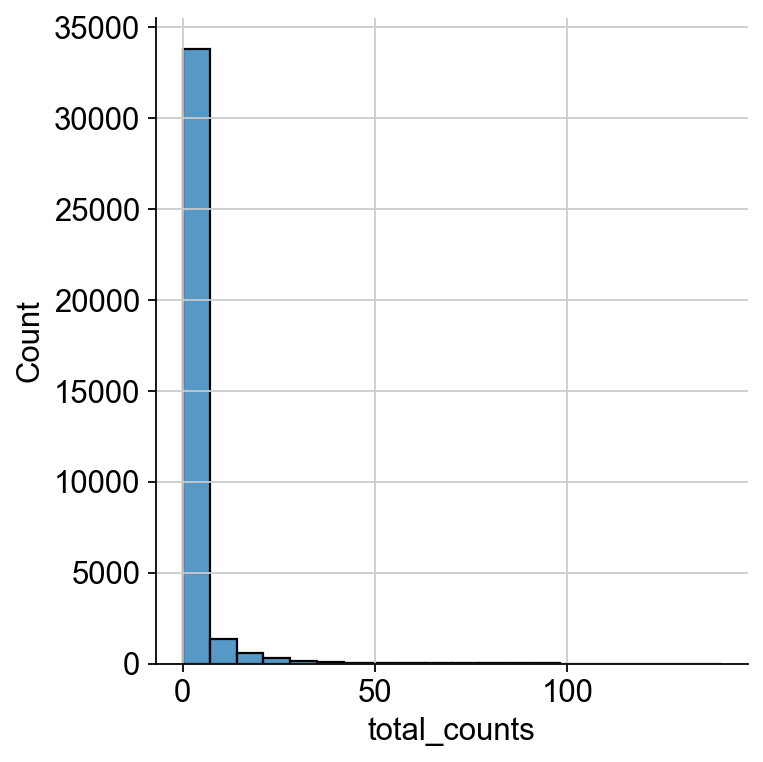

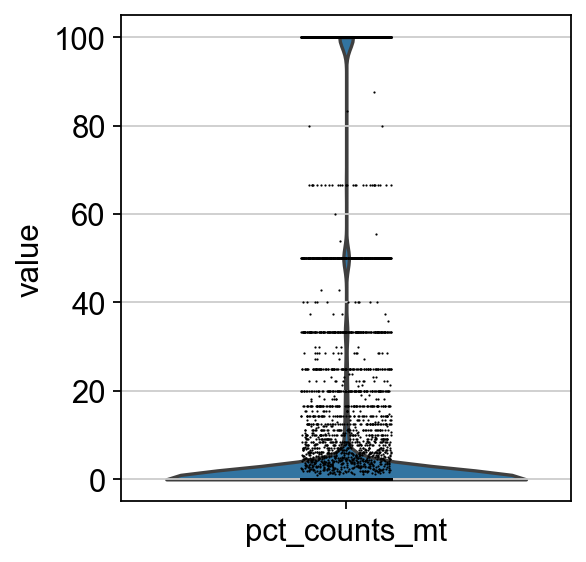

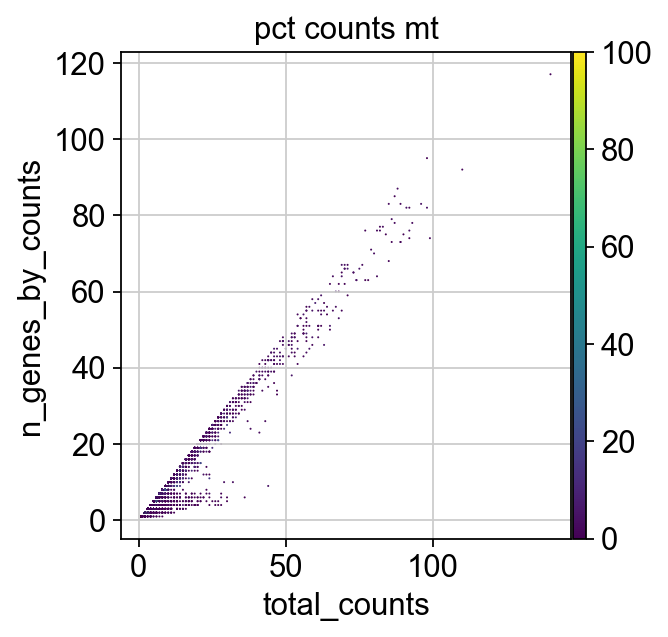

In [123]:
p1 = sns.displot(adata.obs["total_counts"], bins=20, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "pct_counts_mt")
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

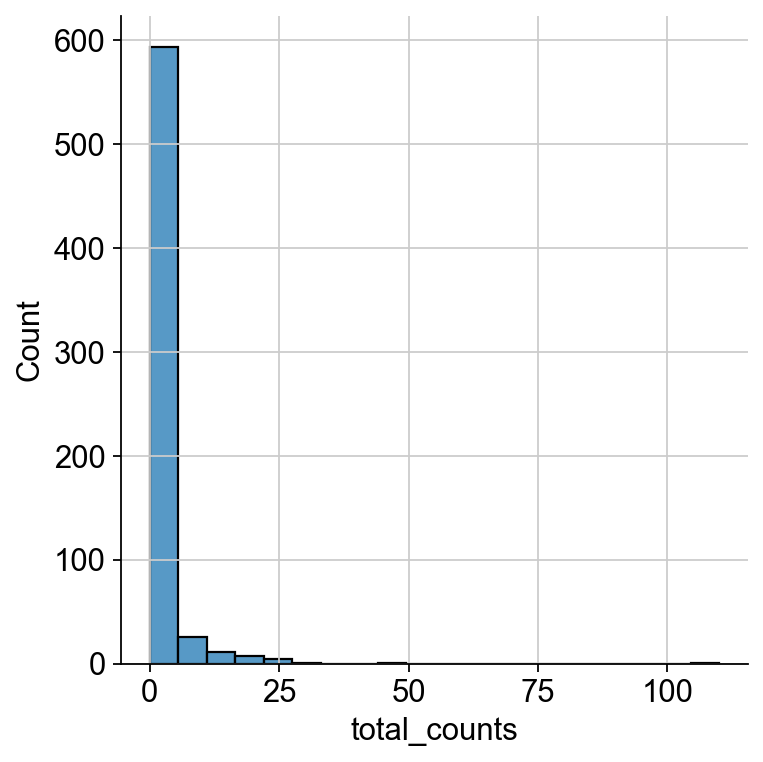

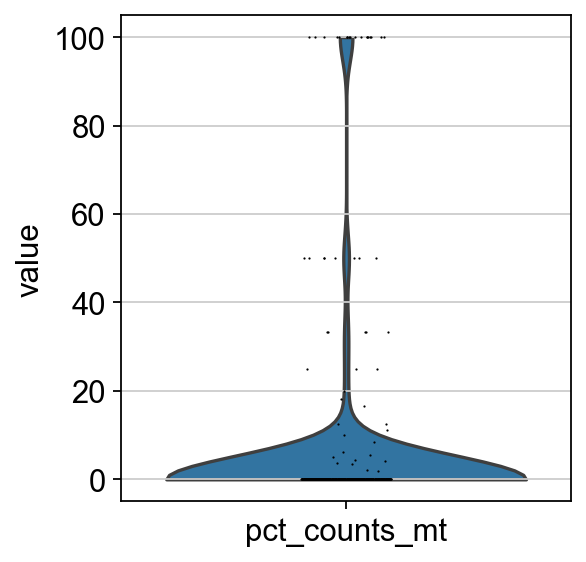

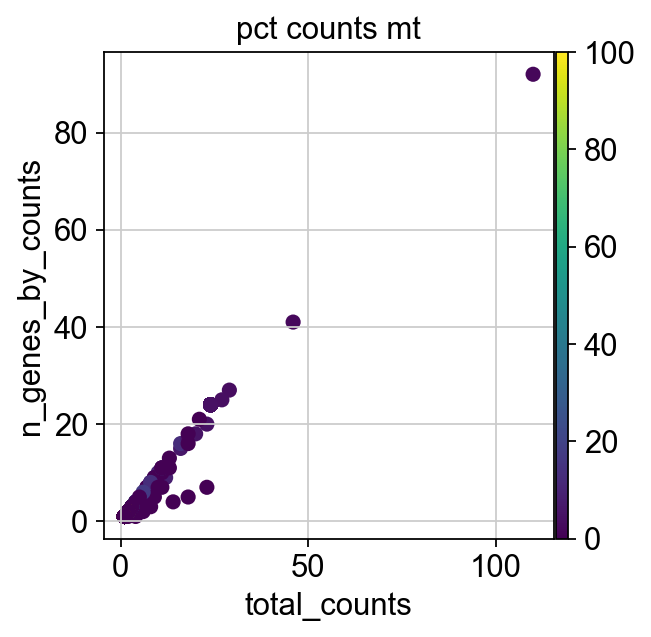

In [88]:
p1 = sns.displot(adata.obs["total_counts"], bins=20, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "pct_counts_mt")
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")